In [1]:
import numpy as np
import pandas as pd
import random
import os
working_dir = "/Users/nkarisan/PycharmProjects/BTC_Cell_Line_Atlas_Manuscript"
os.chdir(working_dir)

import scripts.io_library as io_library
io_library.input_dir = 'input_data/'
io_library.output_dir = 'Remaining_Analyses/output_files/'

from scripts.io_library import MyLib
from scripts.utils import Utils
from scripts.visualization import MyVisualization

In [2]:
import matplotlib
seed = 2023
random.seed(seed)
np.random.seed(seed)

matplotlib.use("nbagg")


%matplotlib inline
%config InlineBackend.figure_format = "retina"


%load_ext autoreload
%autoreload 2

# Create Supplementary Table S9

In [3]:
target_genes_1 = sorted(['MDM4', 'BRAF', 'ERBB2', 'PPCDC', 'TP63', 'FDFT1',
                'STAMBP', 'PRKCI', 'KIF18B', 'ITGB5', 'CTNNB1', 'SREBF1',
                'ELMO2', 'PRKRA', 'MAPK1', 'MAP2K1', 'TGFBR1', 'SQLE',
                'TYMS', 'DPM2', 'SLC7A1', 'MBTD1', 'FPGS', 'IPPK',
                'HNF1B','NXT1', 'GRHL2', 'UXS1', 'ITGAV', 'TEAD1', 'STX4',
                'PARD6B', 'NAMPT', 'FADD', 'FERMT2', 'EGFR', 'SOX9', 'STXBP3',
                 'BRK1', 'MARK2', 'WWTR1', 'CRKL', 'RAB10',
                'SLC7A5', 'SLC2A1', 'RFK', 'ARHGEF7', 'ITGB1',
                'TUBB4B', 'CRK', 'HDAC7', 'ITGA3',
                'CDK4', 'IDH3A', 'DHODH', 'NMNAT1', 'ABI1', 'CDH1'])
target_genes_2 = sorted(['NCKAP1', 'KRAS', 'PIK3CA', 'AHCYL1'])
target_genes_3 = sorted(['PTPN11', 'PRMT5', 'SNAP23', 'SLC3A2', 'RIC1', 'RAB6A'])
target_genes = target_genes_1+target_genes_2+target_genes_3
genes_table_df = pd.DataFrame(index=target_genes, dtype=float)

In [4]:
gene_effect_thr_dic = {gene:-0.5 for gene in target_genes_1}
gene_effect_thr_dic.update({gene:-0.8 for gene in target_genes_2})
gene_effect_thr_dic.update({gene:-1 for gene in target_genes_3})
len(gene_effect_thr_dic)

68

In [5]:
gene_effect_thr_dic

{'ABI1': -0.5,
 'ARHGEF7': -0.5,
 'BRAF': -0.5,
 'BRK1': -0.5,
 'CDH1': -0.5,
 'CDK4': -0.5,
 'CRK': -0.5,
 'CRKL': -0.5,
 'CTNNB1': -0.5,
 'DHODH': -0.5,
 'DPM2': -0.5,
 'EGFR': -0.5,
 'ELMO2': -0.5,
 'ERBB2': -0.5,
 'FADD': -0.5,
 'FDFT1': -0.5,
 'FERMT2': -0.5,
 'FPGS': -0.5,
 'GRHL2': -0.5,
 'HDAC7': -0.5,
 'HNF1B': -0.5,
 'IDH3A': -0.5,
 'IPPK': -0.5,
 'ITGA3': -0.5,
 'ITGAV': -0.5,
 'ITGB1': -0.5,
 'ITGB5': -0.5,
 'KIF18B': -0.5,
 'MAP2K1': -0.5,
 'MAPK1': -0.5,
 'MARK2': -0.5,
 'MBTD1': -0.5,
 'MDM4': -0.5,
 'NAMPT': -0.5,
 'NMNAT1': -0.5,
 'NXT1': -0.5,
 'PARD6B': -0.5,
 'PPCDC': -0.5,
 'PRKCI': -0.5,
 'PRKRA': -0.5,
 'RAB10': -0.5,
 'RFK': -0.5,
 'SLC2A1': -0.5,
 'SLC7A1': -0.5,
 'SLC7A5': -0.5,
 'SOX9': -0.5,
 'SQLE': -0.5,
 'SREBF1': -0.5,
 'STAMBP': -0.5,
 'STX4': -0.5,
 'STXBP3': -0.5,
 'TEAD1': -0.5,
 'TGFBR1': -0.5,
 'TP63': -0.5,
 'TUBB4B': -0.5,
 'TYMS': -0.5,
 'UXS1': -0.5,
 'WWTR1': -0.5,
 'AHCYL1': -0.8,
 'KRAS': -0.8,
 'NCKAP1': -0.8,
 'PIK3CA': -0.8,
 'PRMT5': -1,

In [6]:
gene_effect_file = 'Main_Data/CRISPR/CRISPR.csv'
gene_effect_df = MyLib.load_csv(gene_effect_file, index_col=0)
gene_effect_df = gene_effect_df.T
gene_effect_df = gene_effect_df.rename(columns={c:c.split(' (')[0] for c in gene_effect_df.columns})

upset_file = 'cell_lines_master_upset_2025-2-24.csv'
raw_upset_df = MyLib.load_csv(upset_file, index_col=0)
upset_df = raw_upset_df[(raw_upset_df['CRISPR']==1) & (raw_upset_df['Subtype']!='HCC')]
gene_effect_df =  gene_effect_df.loc[upset_df.index, :]

gene_effect_df.shape

input_data/Main_Data/CRISPR/CRISPR.csv  is loaded, shape:  (18443, 60)

input_data/cell_lines_master_upset_2025-2-24.csv  is loaded, shape:  (87, 11)



(39, 18443)

# BTC Common Essential

In [7]:
count_thr = 20
for gene in target_genes:
    total = (gene_effect_df[gene] < -0.5).sum()
    if total >= count_thr:
        genes_table_df.loc[gene, 'BTC common essential'] ='Yes'

# Dependent Cell Lines

In [8]:
for gene in target_genes:
    total = (gene_effect_df[gene] < gene_effect_thr_dic[gene]).sum()
    percentage = (gene_effect_df[gene] < gene_effect_thr_dic[gene]).mean() * 100
    average = gene_effect_df.loc[(gene_effect_df[gene] < gene_effect_thr_dic[gene]), gene].median()

    genes_table_df.loc[gene, 'Dependent Cell Lines'] = int(total)
    genes_table_df.loc[gene, 'Dependent Cell Lines (%)'] = round(percentage)
    genes_table_df.loc[gene, 'Dependent Cell Lines Median Gene Effect'] = average

## LRT columns

In [9]:
lrt_output_file = 'Figure7/output_fig7/lrt_plot_genes.csv'
lrt_df = pd.read_csv(lrt_output_file, index_col=0)
lrt_df

,Dependent Cell Lines,Dependent Cell Lines (%),Dependent Cell Lines (fractions),Dependent Cell Lines Median Gene Effect,NormLRT
Gene,,,,,
AAAS,4.0,10.0,0.102564,-0.759003,12.887380
AARS2,8.0,21.0,0.205128,-0.568605,0.465015
ABCA4,2.0,5.0,0.051282,-0.642254,3.948314
ABHD11,4.0,10.0,0.102564,-0.732569,7.270102
ABI1,8.0,21.0,0.205128,-0.587920,22.288772
...,...,...,...,...,...
ZSCAN18,2.0,5.0,0.051282,-0.514467,10.360088
ZSWIM8,3.0,8.0,0.076923,-0.508441,2.022947
ZW10,3.0,8.0,0.076923,-0.629180,0.074405


In [10]:
selected_cols = ['NormLRT']
shared_genes = set(target_genes).intersection(lrt_df.index)
genes_table_df[selected_cols] = lrt_df.loc[shared_genes, selected_cols].copy()

Genes Not Selective Using NormLRT Scores

In [11]:
diff_genes = sorted(set(target_genes).difference(lrt_df.index))
diff_genes

['PIK3CA', 'PRMT5', 'PTPN11']

# 3p

In [12]:
ssgsea_3p_file = 'Figure3/output_fig3/btc_ssgsea_zscored_3p13 Peaks_tcga.csv'
ssgsea_3p_df = pd.read_csv(ssgsea_3p_file, index_col=0)
ssgsea_3p_df['Status'] = 'Low 3p13 ssGSEA'
ssgsea_3p_df.loc[ssgsea_3p_df['ssGSEA']>0, 'Status']= 'High 3p13 ssGSEA'
ssgsea_3p_df

,ssGSEA,Status
Cell_line,,
SNU869,1.047410,High 3p13 ssGSEA
SNU478,0.491806,High 3p13 ssGSEA
TGBC52TKB,0.998703,High 3p13 ssGSEA
AOVC1,1.052649,High 3p13 ssGSEA
SNU245,1.039064,High 3p13 ssGSEA
SNU1196,1.245941,High 3p13 ssGSEA
EGI1,-0.095676,Low 3p13 ssGSEA
KKU100,0.943710,High 3p13 ssGSEA
TFK1,0.117248,High 3p13 ssGSEA


In [13]:
genes_table_df = Utils.process_dependency_table(genes_table_df, upset_df, gene_effect_df, target_genes, gene_effect_thr_dic, ssgsea_3p_df, 'Status')

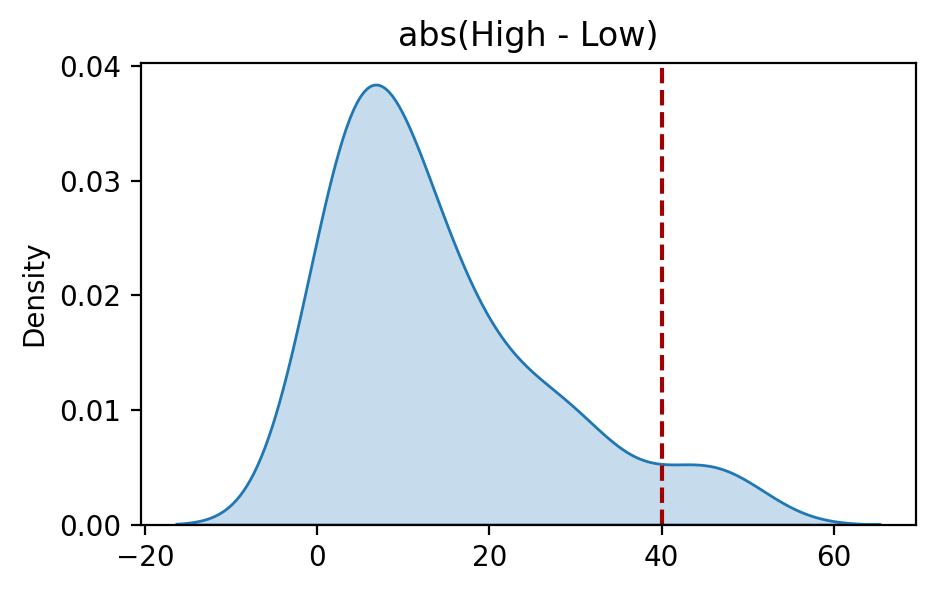

In [14]:
cols_l = [c for c in genes_table_df.columns if '3p13' in c]
df = abs(genes_table_df[cols_l[0]]-genes_table_df[cols_l[1]])
MyVisualization.plot_distribution(df, 'abs(High - Low)', x_vline=40)

In [15]:
cols_l = [c for c in genes_table_df.columns if '3p13' in c]
for index, row in genes_table_df.iterrows():
    val1 = row[cols_l[0]]
    val2 = row[cols_l[1]]
    if (pd.isna(val1) or pd.isna(val2)) or abs(val1-val2) < 40:
        genes_table_df.loc[index, cols_l[0]] = np.nan
        genes_table_df.loc[index, cols_l[1]] = np.nan

In [16]:
genes_table_df

,BTC common essential,Dependent Cell Lines,Dependent Cell Lines (%),Dependent Cell Lines Median Gene Effect,NormLRT,High 3p13 ssGSEA[n=17] (%),Low 3p13 ssGSEA[n=20] (%)
ABI1,NaN,8.0,21.0,-0.587920,22.288772,NaN,NaN
ARHGEF7,Yes,24.0,62.0,-0.776864,2.910097,NaN,NaN
BRAF,NaN,4.0,10.0,-1.000673,49.846968,NaN,NaN
BRK1,NaN,13.0,33.0,-0.798767,7.568821,NaN,NaN
CDH1,NaN,8.0,21.0,-0.773961,11.860180,NaN,NaN
...,...,...,...,...,...,...,...
PTPN11,Yes,20.0,51.0,-1.231128,NaN,29.0,70.0
RAB6A,Yes,14.0,36.0,-1.170115,0.000068,NaN,NaN
RIC1,Yes,16.0,41.0,-1.373046,0.001691,NaN,NaN
SLC3A2,Yes,4.0,10.0,-1.149046,2.776041,NaN,NaN


# Genotype 

In [17]:
top_mut_file = 'Additional_Data/Selected_Lists/heatmap_top_alterations.csv'
top_mut_df = MyLib.load_csv(top_mut_file, index_col=0)
top_mut_df = top_mut_df.loc[upset_df.index,:].copy()
top_mut_df = top_mut_df.fillna(0)
top_mut_df = top_mut_df.rename(columns={c:c+' MT' for c in top_mut_df.columns})
for c in top_mut_df.columns:
    top_mut_df[c] = top_mut_df[c].apply(lambda x: c if x != 0 else x)

top_mut_df

input_data/Additional_Data/Selected_Lists/heatmap_top_alterations.csv  is loaded, shape:  (87, 12)



,ARID1A MT,BAP1 MT,BRAF MT,CDKN2A MT,EGFR MT,ERBB2 MT,FGFR2 MT,KRAS MT,PBRM1 MT,SMAD4 MT,TP53 MT,IDH1/2 MT
Cell_line,,,,,,,,,,,,
SNU869,0,0,0,CDKN2A MT,0,0,0,KRAS MT,0,SMAD4 MT,0,0
SNU478,0,0,0,CDKN2A MT,0,0,0,0,0,0,TP53 MT,0
TGBC52TKB,0,0,0,CDKN2A MT,0,0,0,KRAS MT,0,0,0,0
AOVC1,0,0,0,0,0,0,0,0,0,0,TP53 MT,0
TGBC18TKB,0,0,0,CDKN2A MT,0,ERBB2 MT,0,0,0,0,TP53 MT,0
SNU1196,0,0,0,CDKN2A MT,0,0,0,0,0,SMAD4 MT,TP53 MT,0
EGI1,0,0,0,CDKN2A MT,0,0,0,KRAS MT,0,0,TP53 MT,0
KKU100,0,0,0,CDKN2A MT,0,0,0,KRAS MT,0,SMAD4 MT,0,0
TFK1,0,BAP1 MT,0,CDKN2A MT,0,0,0,0,0,0,TP53 MT,0


In [18]:
percentage_thr_dic = {'ARID1A MT':50, 'BAP1 MT':100, 'BRAF MT':100, 'IDH1/2 MT':100, 'ERBB2 MT':100,  'PBRM1 MT':100, 'EGFR MT':50, 'FGFR2 MT':75, 'CDKN2A MT':40, 'KRAS MT':40, 'SMAD4 MT':40, 'TP53 MT':0}
for c in top_mut_df.columns:
    genes_table_df = Utils.process_dependency_table(genes_table_df, upset_df, gene_effect_df, target_genes, gene_effect_thr_dic, top_mut_df, c, thr_dic=percentage_thr_dic)

In [19]:
genes_table_df

,BTC common essential,Dependent Cell Lines,Dependent Cell Lines (%),Dependent Cell Lines Median Gene Effect,NormLRT,High 3p13 ssGSEA[n=17] (%),Low 3p13 ssGSEA[n=20] (%),ARID1A MT[n=5] (%),BAP1 MT[n=2] (%),BRAF MT[n=2] (%),CDKN2A MT[n=24] (%),EGFR MT[n=3] (%),ERBB2 MT[n=2] (%),FGFR2 MT[n=4] (%),KRAS MT[n=14] (%),PBRM1 MT[n=2] (%),SMAD4 MT[n=10] (%),TP53 MT[n=29] (%),IDH1/2 MT[n=2] (%)
ABI1,NaN,8.0,21.0,-0.587920,22.288772,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN
ARHGEF7,Yes,24.0,62.0,-0.776864,2.910097,NaN,NaN,NaN,NaN,100.0,58.0,NaN,NaN,75.0,57.0,NaN,60.0,69.0,100.0
BRAF,NaN,4.0,10.0,-1.000673,49.846968,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN
BRK1,NaN,13.0,33.0,-0.798767,7.568821,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,NaN
CDH1,NaN,8.0,21.0,-0.773961,11.860180,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PTPN11,Yes,20.0,51.0,-1.231128,NaN,29.0,70.0,60.0,NaN,NaN,54.0,67.0,100.0,100.0,NaN,100.0,60.0,55.0,100.0
RAB6A,Yes,14.0,36.0,-1.170115,0.000068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,40.0,45.0,NaN
RIC1,Yes,16.0,41.0,-1.373046,0.001691,NaN,NaN,NaN,100.0,NaN,NaN,67.0,100.0,NaN,NaN,NaN,60.0,52.0,NaN
SLC3A2,Yes,4.0,10.0,-1.149046,2.776041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN


# Anatomical Subtype

In [20]:
percentage_thr_dic = {'AC':80, 'ECC':50, 'GBC':50, 'ICC':20}
genes_table_df = Utils.process_dependency_table(genes_table_df, upset_df, gene_effect_df, target_genes, gene_effect_thr_dic, upset_df, 'Subtype', thr_dic=percentage_thr_dic)

In [21]:
genes_table_df

,BTC common essential,Dependent Cell Lines,Dependent Cell Lines (%),Dependent Cell Lines Median Gene Effect,NormLRT,High 3p13 ssGSEA[n=17] (%),Low 3p13 ssGSEA[n=20] (%),ARID1A MT[n=5] (%),BAP1 MT[n=2] (%),BRAF MT[n=2] (%),...,FGFR2 MT[n=4] (%),KRAS MT[n=14] (%),PBRM1 MT[n=2] (%),SMAD4 MT[n=10] (%),TP53 MT[n=29] (%),IDH1/2 MT[n=2] (%),AC[n=5] (%),ECC[n=7] (%),GBC[n=6] (%),ICC[n=21] (%)
ABI1,NaN,8.0,21.0,-0.587920,22.288772,NaN,NaN,NaN,NaN,100.0,...,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,24.0
ARHGEF7,Yes,24.0,62.0,-0.776864,2.910097,NaN,NaN,NaN,NaN,100.0,...,75.0,57.0,NaN,60.0,69.0,100.0,NaN,57.0,50.0,67.0
BRAF,NaN,4.0,10.0,-1.000673,49.846968,NaN,NaN,NaN,NaN,100.0,...,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN
BRK1,NaN,13.0,33.0,-0.798767,7.568821,NaN,NaN,NaN,NaN,100.0,...,NaN,NaN,NaN,NaN,34.0,NaN,NaN,NaN,67.0,33.0
CDH1,NaN,8.0,21.0,-0.773961,11.860180,NaN,NaN,NaN,NaN,100.0,...,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PTPN11,Yes,20.0,51.0,-1.231128,NaN,29.0,70.0,60.0,NaN,NaN,...,100.0,NaN,100.0,60.0,55.0,100.0,NaN,NaN,50.0,67.0
RAB6A,Yes,14.0,36.0,-1.170115,0.000068,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,40.0,45.0,NaN,NaN,NaN,NaN,33.0
RIC1,Yes,16.0,41.0,-1.373046,0.001691,NaN,NaN,NaN,100.0,NaN,...,NaN,NaN,NaN,60.0,52.0,NaN,NaN,NaN,50.0,43.0
SLC3A2,Yes,4.0,10.0,-1.149046,2.776041,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN


# RNA Clusters

In [22]:
rna_cluster_file = 'Figure5/output_fig5/RNA_Gene_reordered_upset_df.csv'
rna_cluster_df = pd.read_csv(rna_cluster_file, index_col=0)
rna_cluster_df

,RNA_Cluster,Subtype
SNU886,R1,HCC
JHH4,R1,HCC
SNU449,R1,HCC
OCUG1,R1,GBC
NOZ,R1,GBC
...,...,...
SNU1196,R4,ECC
TKKK,R4,ICC
SNU245,R4,ECC
OZ,R4,ICC


In [23]:
percentage_thr_dic = {'R1':50, 'R2':100, 'R3':50, 'R4':20}
cluster_col = 'RNA_Cluster'
genes_table_df = Utils.process_dependency_table(genes_table_df, upset_df, gene_effect_df, target_genes, gene_effect_thr_dic, rna_cluster_df, cluster_col, thr_dic=percentage_thr_dic)

In [24]:
genes_table_df

,BTC common essential,Dependent Cell Lines,Dependent Cell Lines (%),Dependent Cell Lines Median Gene Effect,NormLRT,High 3p13 ssGSEA[n=17] (%),Low 3p13 ssGSEA[n=20] (%),ARID1A MT[n=5] (%),BAP1 MT[n=2] (%),BRAF MT[n=2] (%),...,TP53 MT[n=29] (%),IDH1/2 MT[n=2] (%),AC[n=5] (%),ECC[n=7] (%),GBC[n=6] (%),ICC[n=21] (%),R1[n=8] (%),R2[n=1] (%),R3[n=7] (%),R4[n=21] (%)
ABI1,NaN,8.0,21.0,-0.587920,22.288772,NaN,NaN,NaN,NaN,100.0,...,24.0,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,38.0
ARHGEF7,Yes,24.0,62.0,-0.776864,2.910097,NaN,NaN,NaN,NaN,100.0,...,69.0,100.0,NaN,57.0,50.0,67.0,62.0,NaN,86.0,57.0
BRAF,NaN,4.0,10.0,-1.000673,49.846968,NaN,NaN,NaN,NaN,100.0,...,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BRK1,NaN,13.0,33.0,-0.798767,7.568821,NaN,NaN,NaN,NaN,100.0,...,34.0,NaN,NaN,NaN,67.0,33.0,NaN,100.0,NaN,43.0
CDH1,NaN,8.0,21.0,-0.773961,11.860180,NaN,NaN,NaN,NaN,100.0,...,21.0,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PTPN11,Yes,20.0,51.0,-1.231128,NaN,29.0,70.0,60.0,NaN,NaN,...,55.0,100.0,NaN,NaN,50.0,67.0,NaN,NaN,100.0,43.0
RAB6A,Yes,14.0,36.0,-1.170115,0.000068,NaN,NaN,NaN,NaN,NaN,...,45.0,NaN,NaN,NaN,NaN,33.0,NaN,NaN,NaN,52.0
RIC1,Yes,16.0,41.0,-1.373046,0.001691,NaN,NaN,NaN,100.0,NaN,...,52.0,NaN,NaN,NaN,50.0,43.0,NaN,NaN,NaN,52.0
SLC3A2,Yes,4.0,10.0,-1.149046,2.776041,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Proteins Clusters

In [25]:
proteins_cluster_file = 'Figure6/output_fig6/Protein_reordered_upset_df.csv'
proteins_cluster_df = pd.read_csv(proteins_cluster_file, index_col=0)
proteins_cluster_df

,Cluster,Subtype,RNA_Cluster
ICC26,P1,ICC,R3
ICC28,P1,ICC,NaN
GB4,P1,GBC,NaN
TGBC14TKB,P1,GBC,NaN
G415,P1,GBC,R1
...,...,...,...
SNU869,P5,AC,R4
SNU308,P5,GBC,R4
HKGZCC,P5,ICC,R4
SNU1196,P5,ECC,R4


In [26]:
percentage_thr_dic = {'P1':50, 'P2':50, 'P3':50, 'P4':50, 'P5':50 }
cluster_col = 'Cluster'
genes_table_df = Utils.process_dependency_table(genes_table_df, upset_df, gene_effect_df, target_genes, gene_effect_thr_dic, proteins_cluster_df, cluster_col, thr_dic=percentage_thr_dic)

In [27]:
genes_table_df

,BTC common essential,Dependent Cell Lines,Dependent Cell Lines (%),Dependent Cell Lines Median Gene Effect,NormLRT,High 3p13 ssGSEA[n=17] (%),Low 3p13 ssGSEA[n=20] (%),ARID1A MT[n=5] (%),BAP1 MT[n=2] (%),BRAF MT[n=2] (%),...,ICC[n=21] (%),R1[n=8] (%),R2[n=1] (%),R3[n=7] (%),R4[n=21] (%),P1[n=7] (%),P2[n=3] (%),P3[n=9] (%),P4[n=5] (%),P5[n=13] (%)
ABI1,NaN,8.0,21.0,-0.587920,22.288772,NaN,NaN,NaN,NaN,100.0,...,24.0,NaN,NaN,NaN,38.0,NaN,NaN,NaN,NaN,NaN
ARHGEF7,Yes,24.0,62.0,-0.776864,2.910097,NaN,NaN,NaN,NaN,100.0,...,67.0,62.0,NaN,86.0,57.0,71.0,NaN,NaN,100.0,69.0
BRAF,NaN,4.0,10.0,-1.000673,49.846968,NaN,NaN,NaN,NaN,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BRK1,NaN,13.0,33.0,-0.798767,7.568821,NaN,NaN,NaN,NaN,100.0,...,33.0,NaN,100.0,NaN,43.0,NaN,67.0,NaN,NaN,NaN
CDH1,NaN,8.0,21.0,-0.773961,11.860180,NaN,NaN,NaN,NaN,100.0,...,24.0,NaN,NaN,NaN,33.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PTPN11,Yes,20.0,51.0,-1.231128,NaN,29.0,70.0,60.0,NaN,NaN,...,67.0,NaN,NaN,100.0,43.0,57.0,NaN,56.0,80.0,NaN
RAB6A,Yes,14.0,36.0,-1.170115,0.000068,NaN,NaN,NaN,NaN,NaN,...,33.0,NaN,NaN,NaN,52.0,NaN,NaN,NaN,60.0,NaN
RIC1,Yes,16.0,41.0,-1.373046,0.001691,NaN,NaN,NaN,100.0,NaN,...,43.0,NaN,NaN,NaN,52.0,NaN,NaN,NaN,60.0,NaN
SLC3A2,Yes,4.0,10.0,-1.149046,2.776041,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# CRISPR Clusters

In [28]:
crispr_cluster_file = 'Figure7/output_fig7/LRT_Gene_reordered_upset_df.csv'
crispr_cluster_df = pd.read_csv(crispr_cluster_file, index_col=0)
crispr_cluster_df

,Cluster,Subtype,RNA_Cluster,Protein_Cluster
Cell_line,,,,
KKU100,D1,ECC,R1,P3
OCUG1,D1,GBC,R1,P3
ECC4,D1,ECC,R1,P1
SNU308,D1,GBC,R4,P5
ICC2,D1,ICC,R4,P5
CCC5,D1,ECC,NaN,NaN
SNU1196,D2,ECC,R4,P5
SNU869,D2,AC,R4,P5
TGBC52TKB,D3,AC,R1,P3


In [29]:
percentage_thr_dic = {'D1':50, 'D2':100, 'D3':50, 'D4':50, 'D5':50, 'D6':50}
cluster_col = 'Cluster'
genes_table_df = Utils.process_dependency_table(genes_table_df, upset_df, gene_effect_df, target_genes, gene_effect_thr_dic, crispr_cluster_df, cluster_col, thr_dic=percentage_thr_dic)

# Random Forest

In [30]:
data_dir = 'predictive_model/output_files_RF/random_forest_results'
target_genes_entrz = ['MDM4 (4194)','BRAF (673)', 'ERBB2 (2064)', 'PPCDC (60490)', 'TP63 (8626)', 'FDFT1 (2222)','STAMBP (10617)', 'PRKCI (5584)', 'KIF18B (146909)', 'ITGB5 (3693)', 'CTNNB1 (1499)', 'SREBF1 (6720)','ELMO2 (63916)', 'PRKRA (8575)', 'MAPK1 (5594)','MAP2K1 (5604)','TGFBR1 (7046)', 'SQLE (6713)','TYMS (7298)','DPM2 (8818)', 'SLC7A1 (6541)', 'MBTD1 (54799)', 'FPGS (2356)', 'KRAS (3845)','IPPK (64768)', 'HNF1B (6928)','NXT1 (29107)', 'GRHL2 (79977)', 'UXS1 (80146)', 'ITGAV (3685)', 'TEAD1 (7003)', 'STX4 (6810)', 'PARD6B (84612)', 'NAMPT (10135)', 'FADD (8772)', 'FERMT2 (10979)', 'EGFR (1956)', 'SOX9 (6662)','STXBP3 (6814)', 'NCKAP1 (10787)', 'SNAP23 (8773)', 'BRK1 (55845)', 'MARK2 (2011)', 'WWTR1 (25937)', 'CRKL (1399)', 'RAB10 (10890)', 'SLC7A5 (8140)', 'AHCYL1 (10768)', 'SLC2A1 (6513)', 'RFK (55312)', 'ARHGEF7 (8874)', 'SLC3A2 (6520)', 'ITGB1 (3688)', 'RIC1 (57589)', 'TUBB4B (10383)', 'CRK (1398)', 'RAB6A (5870)', 'HDAC7 (51564)','ITGA3 (3675)', 'CDK4 (1019)', 'IDH3A (3419)', 'DHODH (1723)', 'NMNAT1 (64802)', 'ABI1 (10006)', 'CDH1 (999)', 'PIK3CA (5290)', 'PTPN11 (5781)','PRMT5 (10419)']

random_forest_results_dir = 'random_forest_results'

summary_df = pd.read_csv(os.path.join(data_dir, '1RF_summary.csv'), index_col=0).T
summary_df.head()

DepMap_ID,corr,mse,mae
ABI1 (10006),0.3500,0.0482,0.1637
AHCYL1 (10768),0.5862,0.1530,0.3174
ARHGEF7 (8874),0.4859,0.1236,0.2768
BRAF (673),0.8465,0.0742,0.1704
BRK1 (55845),0.1363,0.1042,0.2485


In [31]:
for gene in target_genes_entrz:
    df, corr = Utils.get_feature_importance(gene, data_dir, summary_df)
    if corr > 0.3:    
        gene = gene.split(' (')[0]
        genes_table_df.loc[gene, 'Top Predictive Feature (ACC > 0.3)'] = df.index.tolist()[0]

# Co-dependencies

In [32]:
gene_effect_df.shape

(39, 18443)

In [33]:
gene_effect_df = gene_effect_df.dropna(axis=1)
df = gene_effect_df[target_genes].copy()
df.shape

(39, 68)

In [34]:
corr_res_df = Utils.pearson_corr(gene_effect_df, df)
corr_res_df.shape

(17787, 68)

In [35]:
sorted_indices_df = np.argsort(corr_res_df, axis=0)
sorted_indices_df

Gene,ABI1,ARHGEF7,BRAF,BRK1,CDH1,CDK4,CRK,CRKL,CTNNB1,DHODH,...,AHCYL1,KRAS,NCKAP1,PIK3CA,PRMT5,PTPN11,RAB6A,RIC1,SLC3A2,SNAP23
Gene,,,,,,,,,,,,,,,,,,,,,
A1BG,9273,12401,3982,4132,15786,15896,12401,9277,6222,14975,...,9308,5074,8821,8888,12084,7292,11829,11829,13637,8590
A1CF,3155,747,10110,10822,10464,7720,15029,5914,6161,15501,...,9372,5922,963,8318,14251,9640,3847,12936,3500,2867
A2M,4319,2539,2266,379,1620,7004,15440,11510,15930,17621,...,1592,3793,14183,10781,11602,5173,11560,995,16913,2173
A2ML1,9478,3267,7223,2090,5393,15876,3946,13968,15365,4034,...,7264,4413,13331,10179,10944,6969,8821,13164,11436,7722
A3GALT2,12536,3018,2763,963,13438,4841,4694,7326,13335,14649,...,8622,12208,12956,11388,17430,7352,9174,15917,16497,2842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,7286,15469,8280,94,10804,7127,870,7649,624,15449,...,16486,11337,1016,3031,1549,5008,924,7345,13788,4406
ZYG11B,16812,5394,15469,7231,3526,12831,12971,12429,3792,9293,...,14102,1291,1015,6642,9485,2300,13072,14937,663,14812
ZYX,6750,3414,8545,12780,15080,5199,5933,16003,16301,1975,...,11160,9070,1594,4339,16825,14370,9487,12680,5009,6702


In [36]:
sorted_codependencies_df = pd.DataFrame(corr_res_df.index.to_numpy()[sorted_indices_df], columns=corr_res_df.columns)
sorted_codependencies_df = sorted_codependencies_df.iloc[::-1]
sorted_codependencies_df.reset_index(inplace=True, drop=True)
sorted_codependencies_df

Gene,ABI1,ARHGEF7,BRAF,BRK1,CDH1,CDK4,CRK,CRKL,CTNNB1,DHODH,...,AHCYL1,KRAS,NCKAP1,PIK3CA,PRMT5,PTPN11,RAB6A,RIC1,SLC3A2,SNAP23
0,ABI1,ARHGEF7,BRAF,BRK1,CDH1,CDK4,CRK,CRKL,CTNNB1,DHODH,...,AHCYL1,KRAS,NCKAP1,PIK3CA,PRMT5,PTPN11,RAB6A,RIC1,SLC3A2,SNAP23
1,NCKAP1,NUP62,MAPK1,NCKAP1,CTNNA1,UBQLN4,TNS3,SAMD4B,TCF7L2,UMPS,...,PPAT,RAF1,ABI1,GNA13,BUB3,GRB2,RIC1,RAB6A,SLC7A5,DHX38
2,HSBP1,CRY1,MAP2K1,RIPK4,TAX1BP3,FCHO1,GNB2,TRAPPC4,TUBB4B,CAD,...,PGM3,MPHOSPH10,BRK1,DYNC2LI1,WBP4,SOS1,NAA25,RGP1,FAM20C,HOXD3
3,WASF2,FOSL1,TLN1,IRF6,CTNND1,RNF113A,RPL24,RAPGEF1,DCTN2,MTHFD1,...,SLC7A6,AXL,ARPC2,HNRNPDL,NAA16,CCL24,RRP12,SYS1,ANKRD1,STX4
4,ITGB1,TLN1,LRRC32,ABI1,PARD6B,INHBE,ARCN1,KLC2,ANAPC15,TKT,...,UGP2,PKD2L1,ARPC3,CLPP,BOP1,FAM20B,ARHGDIB,JAM2,SLC15A4,EDC4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17782,RBM7,CLK3,CFL2,ARIH2,SEMA3G,EXD2,EPHA2,IVNS1ABP,SCPEP1,SSR2,...,MARK2,PUM1,RPIA,PLAGL1,ZNF43,JDP2,MRPL58,TP53AIP1,UGT2B11,CHRAC1
17783,N4BP2L1,COX10,IRF1,CASP2,FOSB,TOB1,DGKH,SLC35C2,THBS3,DLG5,...,ISYNA1,EDIL3,SCO2,NUTM2A,PCK2,IGFBP5,METTL17,RXRG,PLEKHG4,KLK3
17784,DUSP8,CDK15,CCDC86,ADSL,BTBD17,IKZF2,TIPRL,PMEPA1,TPBGL,ZNF701,...,BRIP1,DCTN3,SMARCB1,PANK3,POLR2E,FBXO5,PODXL,ARMC6,WIZ,CCDC121
17785,COASY,ANXA6,NUAK1,PARP9,OR51B5,KLK15,TAOK1,GMPS,GRIA1,TM9SF4,...,MYB,GNAI3,ARIH2,LRRC75B,SMU1,NDUFAB1,DDX46,RP2,CTAGE1,CHRNG


In [37]:
for gene in target_genes:
    genes_table_df.loc[gene, 'Top co-dependency'] = sorted_codependencies_df.loc[1, gene]

# Save the table

In [38]:
genes_table_df

,BTC common essential,Dependent Cell Lines,Dependent Cell Lines (%),Dependent Cell Lines Median Gene Effect,NormLRT,High 3p13 ssGSEA[n=17] (%),Low 3p13 ssGSEA[n=20] (%),ARID1A MT[n=5] (%),BAP1 MT[n=2] (%),BRAF MT[n=2] (%),...,P4[n=5] (%),P5[n=13] (%),D1[n=6] (%),D2[n=2] (%),D3[n=8] (%),D4[n=11] (%),D5[n=7] (%),D6[n=5] (%),Top Predictive Feature (ACC > 0.3),Top co-dependency
ABI1,NaN,8.0,21.0,-0.587920,22.288772,NaN,NaN,NaN,NaN,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,86.0,NaN,PTK6 (RNA),NCKAP1
ARHGEF7,Yes,24.0,62.0,-0.776864,2.910097,NaN,NaN,NaN,NaN,100.0,...,100.0,69.0,NaN,NaN,50.0,73.0,86.0,60.0,PLCXD2 (RNA),NUP62
BRAF,NaN,4.0,10.0,-1.000673,49.846968,NaN,NaN,NaN,NaN,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BRAF (MutHot),MAPK1
BRK1,NaN,13.0,33.0,-0.798767,7.568821,NaN,NaN,NaN,NaN,100.0,...,NaN,NaN,50.0,NaN,NaN,NaN,71.0,NaN,NaN,NCKAP1
CDH1,NaN,8.0,21.0,-0.773961,11.860180,NaN,NaN,NaN,NaN,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,71.0,NaN,C1orf116 (RNA),CTNNA1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PTPN11,Yes,20.0,51.0,-1.231128,NaN,29.0,70.0,60.0,NaN,NaN,...,80.0,NaN,50.0,NaN,50.0,82.0,NaN,60.0,KRAS (MutHot),GRB2
RAB6A,Yes,14.0,36.0,-1.170115,0.000068,NaN,NaN,NaN,NaN,NaN,...,60.0,NaN,NaN,NaN,NaN,NaN,71.0,80.0,FAM124A (RNA),RIC1
RIC1,Yes,16.0,41.0,-1.373046,0.001691,NaN,NaN,NaN,100.0,NaN,...,60.0,NaN,NaN,NaN,NaN,55.0,NaN,100.0,NaN,RAB6A
SLC3A2,Yes,4.0,10.0,-1.149046,2.776041,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SLC7A5


In [39]:
genes_table_df.reset_index(inplace=True)
genes_table_df =genes_table_df.rename(columns={'index': 'Gene'})

In [40]:
with pd.ExcelWriter(os.path.join(io_library.output_dir, 'SuppTableS9_genes_dependencies.xlsx'), engine='xlsxwriter') as writer:
    genes_table_df.to_excel(writer, sheet_name='Sheet1', index=True)
    workbook  = writer.book
    worksheet = writer.sheets['Sheet1']

    for column in genes_table_df.columns:
        col_idx = genes_table_df.columns.get_loc(column) + 1  # +1 to match Excel column indexing
        column_length = max(genes_table_df[column].astype(str).map(len).max(), len(column)) + 2  #padding
        worksheet.set_column(col_idx, col_idx, column_length)